In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

# EDA 

Load dataset

In [3]:
tra = pd.read_csv('/kaggle/input/titanic/train.csv')
tst = pd.read_csv('/kaggle/input/titanic/test.csv')

Let us take a look at the data

In [4]:
print("Training Data:")
tra.head()

Training Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print("Test Data:")
tst.head()

Test Data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print("Training data information: ")
print(tra.info())
print("Test data information: ")
print(tst.info())

Training data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Test data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ----- 

In [7]:
print(f"Dimensions of the training dataset: {tra.shape}")
print(f"Dimensions of the test dataset: {tst.shape}")
columns = tra.columns

Dimensions of the training dataset: (891, 12)
Dimensions of the test dataset: (418, 11)


In [8]:
print(f"""Survived classes: {tra.Survived.unique()}
Pclass classes: {tra.Pclass.unique()}
Sex classes: {tra.Sex.unique()}
SibSp classes: {tra.SibSp.unique()}
Parch classes: {tra.Parch.unique()}
Embarked classes: {tra.Embarked.unique()}""")

Survived classes: [0 1]
Pclass classes: [3 1 2]
Sex classes: ['male' 'female']
SibSp classes: [1 0 3 4 2 5 8]
Parch classes: [0 1 2 5 3 4 6]
Embarked classes: ['S' 'C' 'Q' nan]


All this atributes seem to be categorical but for now we will leave it there.

In [9]:
tra.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing values

In [10]:
nans = tra.isna().sum().sort_values(ascending=False)
pct = 100 * nans / tra.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_missing_values', 'percentage_of_missing_values']
print("Missing values of training set:")
nan_stats

Missing values of training set:


,num_of_missing_values,percentage_of_missing_values
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [11]:
nans = tst.isna().sum().sort_values(ascending=False)
pct = 100 * nans / tst.shape[0]
nan_stats = pd.concat([nans, pct], axis=1)
nan_stats.columns = ['num_of_missing_values', 'percentage_of_missing_values']
print("Missing values of test set:")
nan_stats

Missing values of test set:


,num_of_missing_values,percentage_of_missing_values
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


There are a lot of missing values in `Cabin`, also `Age` has some of them and in the test set we have a missing value in `Fare`. We will see later how we can deal with them.

The column `Pclass` represents the type of accommodation and comfort the passenger had while travelling on the Titanic, let us group the data and see how many people traveled in the  different classes.

In [12]:
tra[['PassengerId', 'Pclass']].groupby('Pclass').count()

,PassengerId
Pclass,
1,216
2,184
3,491


There were 216 in 1rst class, 184 in 2nd class and 491 in 3rd class

Let us see if `Pclass` is correlated with the `Survived` column.

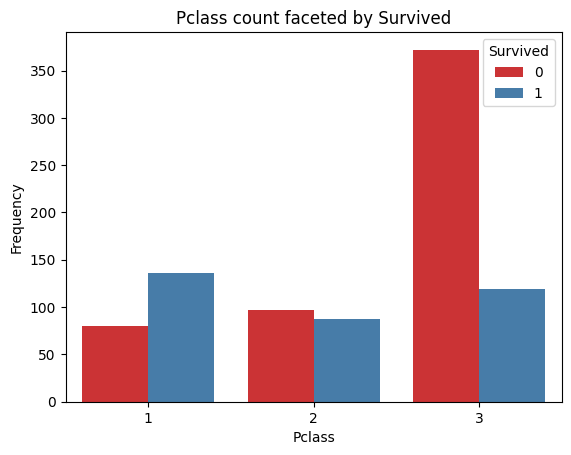

In [13]:
sns.countplot(data=tra, x='Pclass', hue = 'Survived', palette='Set1')

plt.title('Pclass count faceted by Survived')
plt.xlabel('Pclass')
plt.ylabel('Frequency')

plt.show()

Since the `Survived` column takes 0-1 values we can calculate the percentage of survivors in each class using the mean.

In [14]:
tra[['Pclass', 'Survived']].groupby('Pclass').mean() * 100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


So the people that were travelling in 2nd class had almost twice the survival rate of 3rd class, and people travelling in 1rst class had even better rates. 

We can do this same analysis for the rest of the categorical features and extract useful information. We will continue with the variable `Sex`.

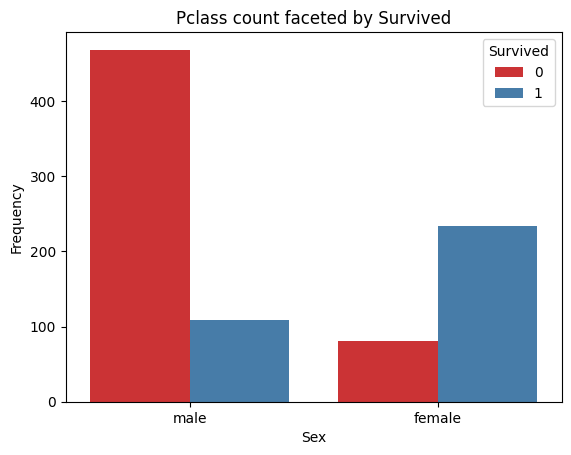

In [15]:
sns.countplot(data=tra, x='Sex', hue = 'Survived', palette='Set1')

plt.title('Pclass count faceted by Survived')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.show()

In [16]:
tra[['Sex', 'Survived']].groupby('Sex').mean() * 100

,Survived
Sex,
female,74.203822
male,18.890815


Men had a significant lower rate of survival.

Let us group together the `Sex` and `Pclass` variables.

In [17]:
tra[['Pclass', 'Sex', 'Survived']].groupby(['Pclass','Sex']).mean() * 100

Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

Let us see if `Embarked` (the port of embarkation) played an important role. Instance counting will be added to prevent bias due to statistically insignificant data.

In [18]:
agg_results = tra[['Pclass', 'Sex', 'Embarked', 'Survived']].groupby(['Pclass', 'Sex', 'Embarked']).agg({
    'Survived': ['mean', 'count']
})

agg_results[('Survived', 'mean')] = agg_results[('Survived', 'mean')] * 100
agg_results

Survived      
                              mean count
Pclass Sex    Embarked                  
1      female C          97.674419    43
              Q         100.000000     1
              S          95.833333    48
       male   C          40.476190    42
              Q           0.000000     1
              S          35.443038    79
2      female C         100.000000     7
              Q         100.000000     2
              S          91.044776    67
       male   C          20.000000    10
              Q           0.000000     1
              S          15.463918    97
3      female C          65.217391    23
              Q          72.727273    33
              S          37.500000    88
       male   C          23.255814    43
              Q           7.692308    39
              S          12.830189   265

We can not assume that the port of embarkation played an important role, it seems that the determinants variables here are `Pclass` and `Sex`. Nonetheless, let us just keep this variable, there might be an underlying relation which we are not aware of right now.

Let us explore the `Age` column.

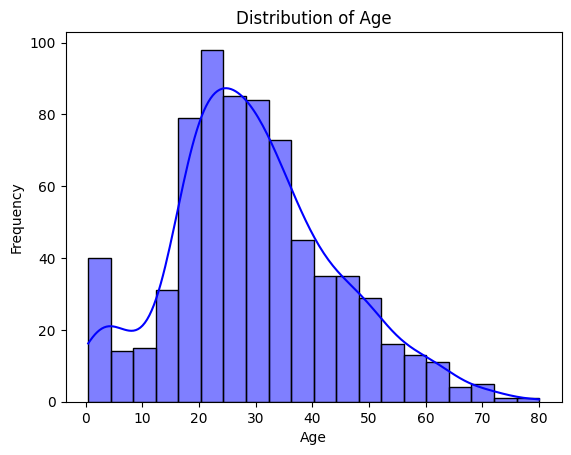

In [19]:
sns.histplot(data=tra, x='Age', bins=20, kde=True, color='blue')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

We can see that the vast majority of the people were young adults in the 20-30 year old frame.

How does survival depend on age? A violin-plot can be used to visualize that.

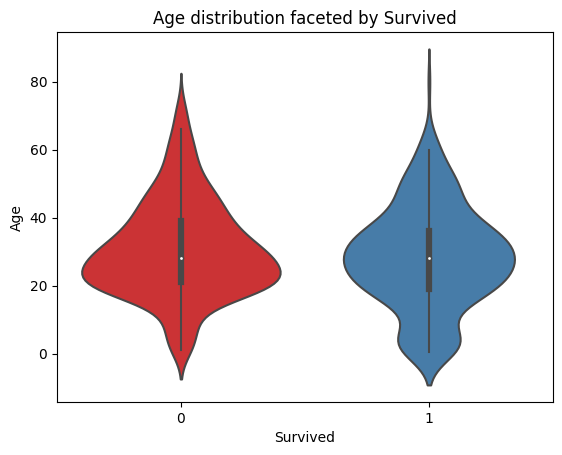

In [20]:
sns.violinplot(data=tra, x='Survived', y='Age', palette='Set1')

plt.title('Age distribution faceted by Survived')
plt.xlabel('Survived')
plt.ylabel('Age')

plt.show()

We can add the `Pclass` variable.

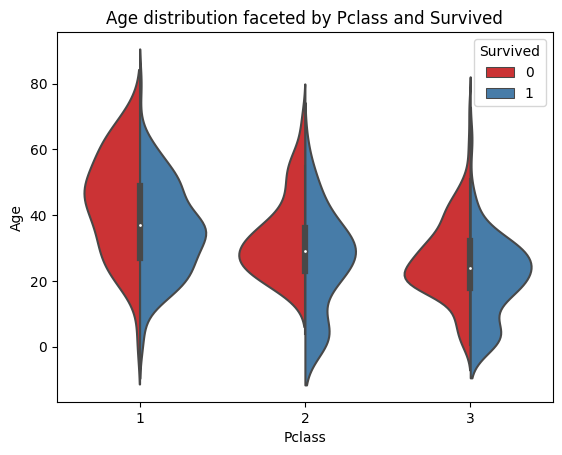

In [21]:
sns.violinplot(data=tra, x='Pclass', y='Age', hue='Survived', split = True, palette='Set1')

plt.title('Age distribution faceted by Pclass and Survived')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.show()

Let us visualize also the age faceting by `Sex`.

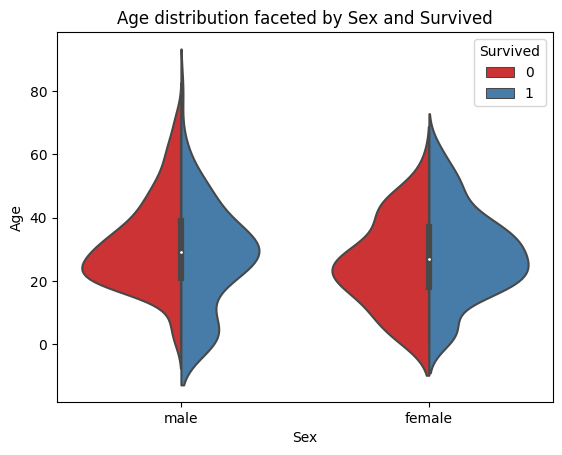

In [22]:
sns.violinplot(data=tra, x='Sex', y='Age', hue='Survived', split = True, palette='Set1')

plt.title('Age distribution faceted by Sex and Survived')
plt.xlabel('Sex')
plt.ylabel('Age')

plt.show()

The last two graphs do not provide a lot of information. But what would happen if we made a variable combining `Pclass` and `Sex`?

In [23]:
tra['PcSex'] = tra['Pclass'].astype(str) + tra['Sex']
tst['PcSex'] = tst['Pclass'].astype(str) + tst['Sex']

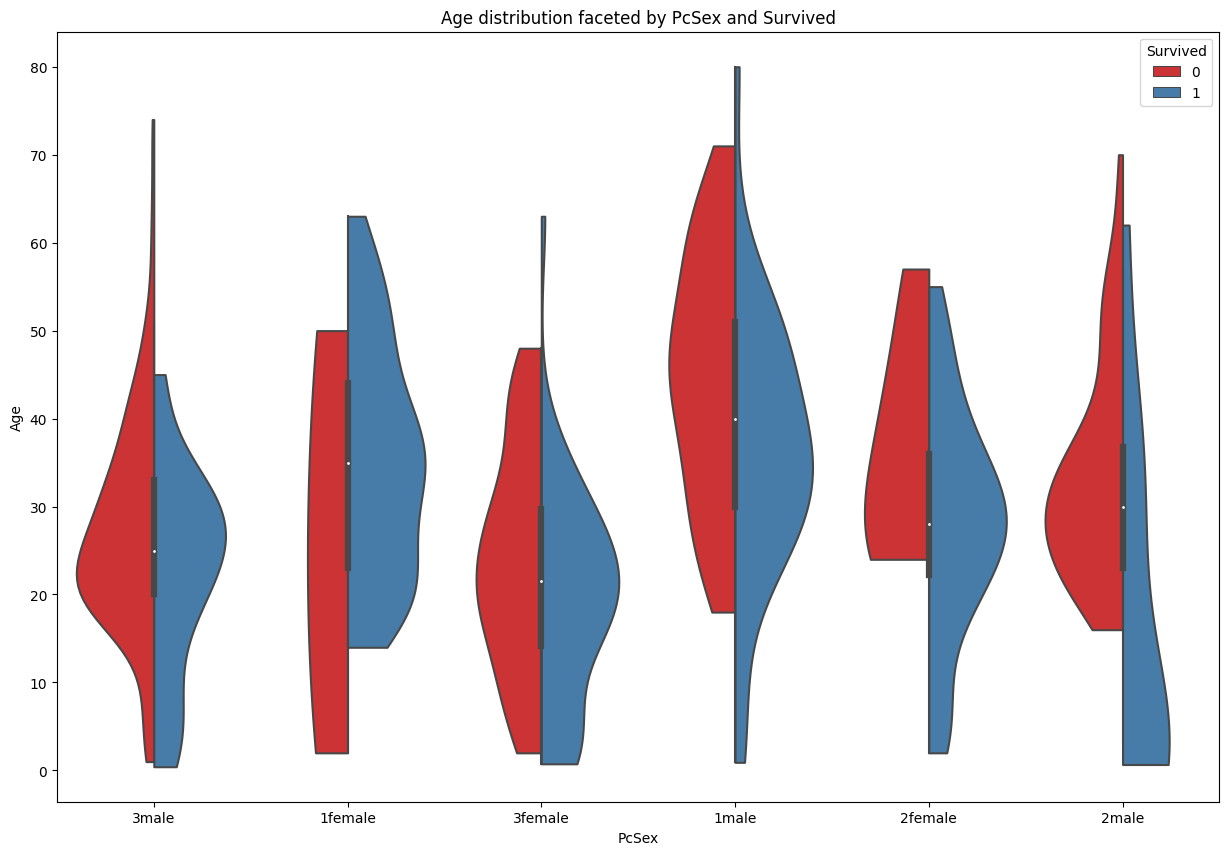

In [24]:
plt.figure(figsize=(15,10))
sns.violinplot(data=tra, x='PcSex', y='Age', hue='Survived', 
               split = True, palette='Set1',cut = 0)

plt.title('Age distribution faceted by PcSex and Survived')
plt.xlabel('PcSex')
plt.ylabel('Age')

plt.show()

This new variable provides more information about the target feature than `Sex` and `Pclass` by their own. Maybe this will have a positive impact on the ML model later.

Let us continue with the `Fare` feature, which represents the price paid for each ticket.

In [25]:
tra.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

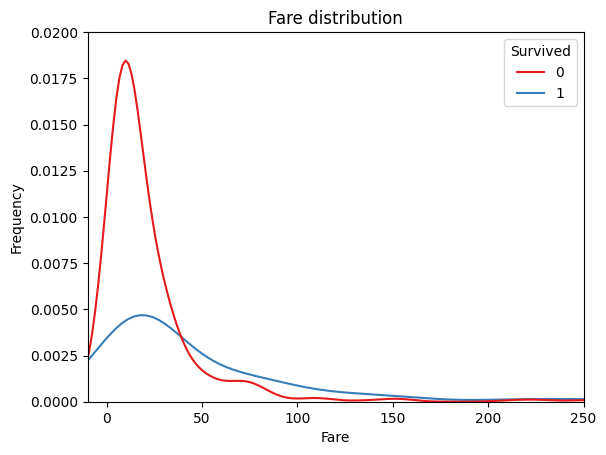

In [26]:
sns.kdeplot(data=tra, x='Fare', hue='Survived', palette='Set1')

plt.title('Fare distribution')
plt.xlabel('Fare')
plt.xlim(-10,250)
plt.ylabel('Frequency')
plt.ylim(0, 0.02)

plt.show()

We can deduce that for high fares, survival probability is higher.

On the other hand, `SibSp` and `Parch` reffer to the number of family members the passenger had travelling with them. Then, we can create another variable named Family that groups the different size of families that where on the ship.

In [27]:
tra['Family'] = np.where((tra['SibSp']+tra['Parch']) == 0 , 'Solo',
                           np.where((tra['SibSp']+tra['Parch']) <= 3,'Nuclear', 'Big'))
tst['Family'] = np.where((tst['SibSp']+tst['Parch']) == 0 , 'Solo',
                           np.where((tst['SibSp']+tst['Parch']) <= 3,'Nuclear', 'Big'))

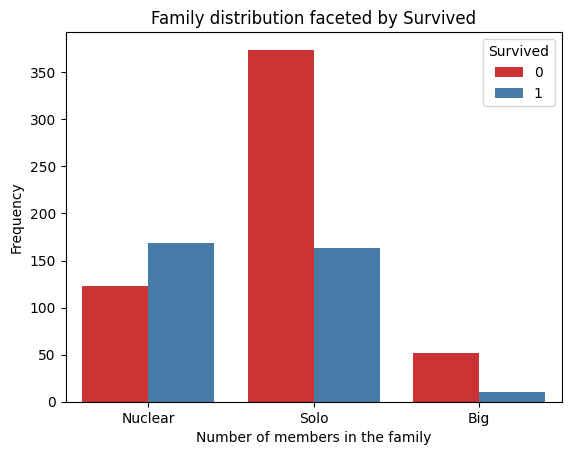

In [28]:
sns.countplot(data=tra, x='Family', hue='Survived', palette = 'Set1')

plt.title('Family distribution faceted by Survived')
plt.xlabel('Number of members in the family')
plt.ylabel('Frequency')

plt.show()

It is interesting how the people that travelled alone or with many family members had less chances of surviving.

The last variables to analyze are `PassengerId`, `Ticket`, `Cabin` and `Name`. The `PassengerId` does not look important, as it serves merely as an index so we will go without it. Also `Cabin` has a lot of missing data so it is better to eliminate this variable, as we may introduce noise imputting the missing values.
`Name` and `Ticket` are a bit special, let us take a look at these columns.

Let us start with `Name`.

In [29]:
tra['Name'].sample(10)

680               Peters, Miss. Katie
839              Marechal, Mr. Pierre
403    Hakkarainen, Mr. Pekka Pietari
99                  Kantor, Mr. Sinai
130              Drazenoic, Mr. Jozef
648                Willey, Mr. Edward
739                Nankoff, Mr. Minko
280                  Duane, Mr. Frank
327           Ball, Mrs. (Ada E Hall)
770            Lievens, Mr. Rene Aime
Name: Name, dtype: object

We may think at first sight that this column is useless, but we can extract the honorifics (Mister, Master, Miss, etc) of each name, with hopes of them being helpful for our model.

In [30]:
tra['Honorific'], tst['Honorific'] = [df.Name.str.extract(' ([A-Za-z]+)\.', expand=False) for df in [tra, tst]]

Let us see how many different honorifics of each class have been extracted.

In [31]:
tra['Honorific'].value_counts()

Honorific
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Here are the honorifics of the missing values in the column `Age`.

In [32]:
tra[tra['Age'].isna()]['Honorific'].value_counts()

Honorific
Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: count, dtype: int64

Additionally, looking at the relationship between the length of a name and survival rate appears to indicate that there is indeed a clear relationship.

In [33]:
tra['Name_Len'] = tra['Name'].apply(lambda x: len(x))
tst['Name_Len'] = tst['Name'].apply(lambda x: len(x))
tra['Survived'].groupby(pd.qcut(tra['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

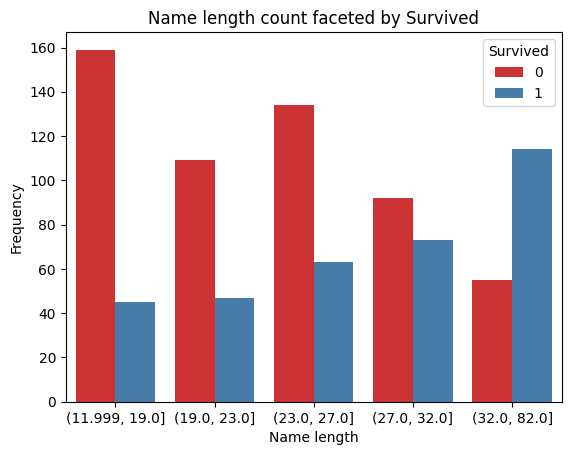

In [34]:
sns.countplot(data=tra, x=pd.qcut(tra['Name_Len'],5), hue = 'Survived', palette = 'Set1')

plt.title('Name length count faceted by Survived')
plt.xlabel('Name length')
plt.ylabel('Frequency')

plt.show()

It looks like people with longer names had higher chances of surviving!

Let us continue with the `Ticket` column.

In [35]:
tra['Ticket'].sample(10)

172      347742
573       14312
846    CA. 2343
613      370377
562      218629
284      113056
392     3101277
409        4133
459      371060
295    PC 17612
Name: Ticket, dtype: object

As we have done with the `Name` column, let us extract the number of characters in the `Ticket` column. This could be a reflection of the 'type' of ticket a given passenger had. 

In [36]:
tra['Ticket_Len'] = tra['Ticket'].apply(lambda x: len(x))
tst['Ticket_Len'] = tst['Ticket'].apply(lambda x: len(x))
tra['Ticket_Len'].value_counts().sort_index()

Ticket_Len
3       2
4     101
5     131
6     419
7      27
8      76
9      26
10     41
11      8
12     10
13     10
15      9
16     11
17     14
18      6
Name: count, dtype: int64

In [37]:
tra.groupby(['Ticket_Len'])['Survived'].agg(['mean', 'count'])

,mean,count
Ticket_Len,,
3,0.000000,2
4,0.366337,101
5,0.618321,131
6,0.319809,419
7,0.296296,27
8,0.539474,76
9,0.192308,26
10,0.341463,41
11,0.250000,8


It's strange, but people whose tickets contained exactly 5 symbols had higher survival chances.

Another piece of information is the first letter of each ticket which might be an indicator of certain atributes of the passenger or their rooms.

In [38]:
tra['Ticket_I'] = tra['Ticket'].str[0]
tst['Ticket_I'] = tst['Ticket'].str[0]
tra['Ticket_I'].value_counts().sort_index()

Ticket_I
1    146
2    183
3    301
4     10
5      3
6      6
7      9
8      2
9      1
A     29
C     47
F      7
L      4
P     65
S     65
W     13
Name: count, dtype: int64

In [39]:
tra.groupby(['Ticket_I'])['Survived'].agg(['mean', 'count'])

,mean,count
Ticket_I,,
1,0.630137,146
2,0.464481,183
3,0.239203,301
4,0.200000,10
5,0.000000,3
6,0.166667,6
7,0.111111,9
8,0.000000,2
9,1.000000,1


Let us transform the column so we group the least frequent characters based on the survival rate.

In [40]:
tra['Ticket_I'] = np.where((tra['Ticket_I']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), tra['Ticket_I'],
                np.where((tra['Ticket_I']).isin(['W', '4', '7', '6', 'L', '5', '8']), 'Low_ticket', 'Other_ticket'))

tst['Ticket_I'] = np.where((tst['Ticket_I']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), tst['Ticket_I'],
                np.where((tst['Ticket_I']).isin(['W', '4', '7', '6', 'L', '5', '8']), 'Low_ticket', 'Other_ticket'))

# Preprocessing

### Missing values

First, let us just drop `Cabin`, since it has a lot of missing values. (Dropping also `PassengerId`).

In [41]:
tra_mod = tra.drop(columns=['Cabin', 'PassengerId'])
tst_mod = tst.drop(columns=['Cabin', 'PassengerId'])

For the `Embarked` column let us just impute the mode of the variable (only 2 missing values).

In [42]:
tra_mod['Embarked'].fillna(tra['Embarked'].mode()[0], inplace=True)
tst_mod['Embarked'].fillna(tra['Embarked'].mode()[0], inplace=True)

The `Age` imputation is going to be a little special: we will insert the mean age grouped by `Pclass`, `Sex` and `Honorific`. Besides, let us create a flag column `Age_flag_na` which indicates if the value of `Age` has been imputated.

In [43]:
tra_mod['Age'].fillna(tra.groupby(['Pclass','Honorific'])['Age'].transform('mean'),
                  inplace=True)
tra_mod['Age_flag_na'] = tra['Age'].apply(lambda x: 1 if pd.isna(x) else 0)
tst_mod['Age'].fillna(tra.groupby(['Pclass','Honorific'])['Age'].transform('mean'), 
                  inplace=True)
tst_mod['Age_flag_na'] = tst['Age'].apply(lambda x: 1 if pd.isna(x) else 0)

Last but not least let just impute the only missing value in the `Fare` column for the test set with its median value in the training set.

In [44]:
tst_mod['Fare'].fillna(tra['Fare'].median(),inplace=True)

In [45]:
print(f"""Missing values in training:\n
{tra_mod.isna().value_counts()}\n
Missing values in test:\n
{tst_mod.isna().value_counts()}""")

Missing values in training:

Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Embarked  PcSex  Family  Honorific  Name_Len  Ticket_Len  Ticket_I  Age_flag_na
False     False   False  False  False  False  False  False   False  False     False  False   False      False     False       False     False          891
Name: count, dtype: int64

Missing values in test:

Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Embarked  PcSex  Family  Honorific  Name_Len  Ticket_Len  Ticket_I  Age_flag_na
False   False  False  False  False  False  False   False  False     False  False   False      False     False       False     False          418
Name: count, dtype: int64


There are no missing values.

### Data transformation

Now let us prepare the data to train our model, we will create dummy variables for the columns that we are going to use.
The function `dummies` used takes the only the columns that the train and test sets share and also which have the same categories.

In [46]:
categorical_columns = ['Pclass', 'Sex', 'Family', 'Honorific', 'Embarked', 'Ticket_I']
numerical_columns = ['Age', 'Fare', 'Age_flag_na', 'Ticket_Len', 'Name_Len']

tra_processed = tra_mod[categorical_columns + numerical_columns + ['Survived']]
tst_processed = tst_mod[categorical_columns + numerical_columns]

def dummies(train, test, columns = categorical_columns):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

Tra, X_tst = dummies(tra_processed, tst_processed)

X_tra = Tra.copy()
y_tra = X_tra.pop('Survived')

# Model

The model is a **Random Forest** classifier initially optimized using **Grid Search**, but the optimized parameters were not used in the final version, we will see why.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(oob_score=True, random_state=1, n_jobs=-1)

param_grid = {
    
   'criterion' : ['gini', 'entropy', 'log_loss'],
    
   'n_estimators': [50, 100, 400, 700, 1000],  # Number of trees in the forest
    
   'max_depth': [10, 20, 30],  # Maximum depth of the tree
    
   'min_samples_split': [2, 5, 10, 15],  # Minimum number of samples required to split an internal node
    
   'min_samples_leaf': [1, 5, 10],   # Minimum number of samples required to be at a leaf node
    
   'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_tra, y_tra)

The best model score and final parameters can be seen below.

best_score = grid_search.best_score_
print(f"Best score reached:\n {best_score}")

print("Best Parameters:")
for key, value in grid_search.best_params_.items():
    print(f"{key}: {value}")

Best score reached:

0.8428598330299417

Best Parameters:

criterion: gini

max_depth: 20

max_features: sqrt

min_samples_leaf: 1

min_samples_split: 5

n_estimators: 50

Grid Search presents an overfitting problem. If we finally decide to use it, it is better to keep the values of `n_estimators` and `max_depth` low, in a range between 5 and 15. Otherwise it will result in an overfitted model.

Here is a model that I developed, which provides decent performance.

In [48]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=7,
                             max_depth=5,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='sqrt',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_tra, y_tra)
print("%.4f" % rf.oob_score_)

0.8025


For this model we obtain an out-of-bag score of **80.25 %** which is nearly the same as the score obtained on the test set.

In [49]:
cv_scores = cross_val_score(rf, X_tra, y_tra, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy scores: [0.78212291 0.82022472 0.83707865 0.80898876 0.86516854]
Mean cross-validation accuracy: 0.8227167158370472


In [50]:
y_pred = rf.predict(X_tst)
submission = pd.DataFrame({
    'PassengerId': tst['PassengerId'],
    'Survived': y_pred
})

submission.to_csv('/kaggle/working/submission.csv', index=False)

# Conclusion

Overfitting is a common issue in machine learning models, including Random Forests, particularly when optimized using techniques like Grid Search. Even with satisfactory data preprocessing and feature engineering, as in our case, an overfitted model will lead to poor results on unseen data. As demonstrated in this notebook, overfitting can be mitigated through techniques such as cross-validation, limiting the depth of individual trees, and reducing the number of features considered for splitting. It is important to note that experience in machine learning plays a significant role in effectively handling these situations. Therefore, while Grid Search is a powerful optimization tool, it is crucial to balance model complexity to prevent overfitting, ensuring robust and reliable performance on new data.

If you've made it this far, thank you for reviewing my work! I would greatly appreciate it if you could upvote this notebook. Thank you!